In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df=pd.read_csv('wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [7]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [8]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    
    train=model.score(xtrain,ytrain)
    test=model.score(xtest,ytest)
    
    print(f'training acc: {train}\n testing acc: {test}\n\n')
    print(classification_report(ytest,ypred))
    return model

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
logreg=mymodel(LogisticRegression())

training acc: 0.9647887323943662
 testing acc: 0.9444444444444444


              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.87      1.00      0.93        13
           3       1.00      0.89      0.94         9

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.94        36
weighted avg       0.95      0.94      0.95        36



## PCA

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

In [12]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
xtrain=pca.fit_transform(xtrain)

In [13]:
xtrain

array([[ 1.45106785,  1.85914043],
       [-1.16342695,  1.41297331],
       [ 0.34393861,  1.93870926],
       [-2.07390734, -1.34699026],
       [-2.23752594, -1.19567755],
       [ 0.7828473 ,  3.0422216 ],
       [ 3.43658215, -0.77277023],
       [-2.62885478, -1.98362772],
       [-2.80963595, -1.6148153 ],
       [-2.20232818, -0.08703376],
       [-1.31986145,  0.49139954],
       [-1.97911028, -1.83895989],
       [-3.61043285, -2.64964226],
       [-3.2259453 , -1.87544577],
       [ 1.47273339,  1.2067983 ],
       [ 2.41322827, -2.10176234],
       [ 2.72253833, -1.49073541],
       [-2.21048357, -0.73591746],
       [ 1.22981038,  2.13708256],
       [-2.59662572, -0.57316588],
       [-2.28538266, -0.79400766],
       [-1.14029108,  1.4207965 ],
       [ 2.97735484, -0.31157243],
       [-2.34420508,  1.84502004],
       [ 0.29998197,  0.63284081],
       [-1.97134055, -1.75622297],
       [ 2.87846692, -1.45084492],
       [ 0.40424353,  2.67636222],
       [ 3.07957409,

In [14]:
xtest=pca.fit_transform(xtest)

In [15]:
pca.explained_variance_ratio_

array([0.38497714, 0.18333702])

<BarContainer object of 2 artists>

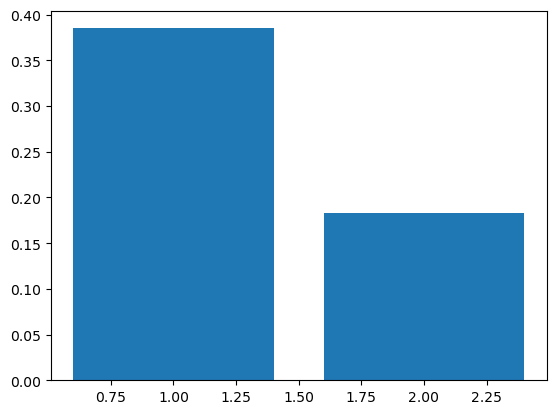

In [16]:
plt.bar(range(1,3),pca.explained_variance_ratio_)

In [17]:
logreg=mymodel(LogisticRegression())

training acc: 0.9647887323943662
 testing acc: 0.9722222222222222


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.93      1.00      0.96        13
           3       1.00      0.89      0.94         9

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36

